# Kaggle Product sales dataset

## About Dataset

### Context

Sales analytics is the practice of generating insights from sales data, trends, and metrics to set targets and forecast future sales performance. Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

### Content

Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
Product - The product that have been sold.
Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
Price Each - The price of each products.
Order Date - This is the date the customer is requesting the order be shipped.
Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

### Target

A target market analysis is an assessment of how your product or service fits into a specific market and where it will gain the most.

### Task:

Q: What was the best Year for sales? How much was earned that Year? 

Q: What was the best month for sales? How much was earned that month? 

Q: What City had the highest number of sales? 

Q: What time should we display adverstisement to maximize likelihood of customer's buying product? 

Q: What products are most often sold together? 

Q: What product sold the most? Why do you think it sold the most? 

### How Much Probability?

How much probability for next people will ordered USB-C Charging Cable? 

How much probability for next people will ordered iPhone? 

How much probability for next people will ordered Google Phone? 

How much probability other peoples will ordered Wired Headphones? 

### Link: https://www.kaggle.com/datasets/knightbearr/sales-product-data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

%matplotlib inline

In [2]:
# We have 12 csv-files with sells information by month
files = os.listdir('archive')
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [3]:
# Collecting paths in new list
paths = []
for file in files:
    file = 'archive/'+file
    paths.append(file)
print(paths)

['archive/Sales_December_2019.csv', 'archive/Sales_April_2019.csv', 'archive/Sales_February_2019.csv', 'archive/Sales_March_2019.csv', 'archive/Sales_August_2019.csv', 'archive/Sales_May_2019.csv', 'archive/Sales_November_2019.csv', 'archive/Sales_October_2019.csv', 'archive/Sales_January_2019.csv', 'archive/Sales_September_2019.csv', 'archive/Sales_July_2019.csv', 'archive/Sales_June_2019.csv']


In [4]:
# Collecting data in one DataFrame
all_months_data = pd.concat(map(pd.read_csv, paths), ignore_index=True)
df = all_months_data.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
# Number or transactions
df.shape[0]

186850

In [6]:
# Missing values
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# Deleting missing data
df.dropna(inplace=True)

In [8]:
# Data types
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
# Deleting invalid rows 
df = df[df['Quantity Ordered'] != 'Quantity Ordered']

In [10]:
# Changing types in numeric and time data
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
# Types after changes
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [12]:
# Stats for numeric data
df.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [13]:
# Add Month and Total Price columns for further analytics
df['Month'] = df['Order Date'].dt.month
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

In [14]:
# Counting monthly revenues
monthly_revenue = df.groupby('Month', as_index=False).agg({'Total Price':'sum'}).rename(columns={'Total Price':'Revenue'})
monthly_revenue

,Month,Revenue
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


[Text(0.5, 1.0, 'Monthly Revenue\n')]

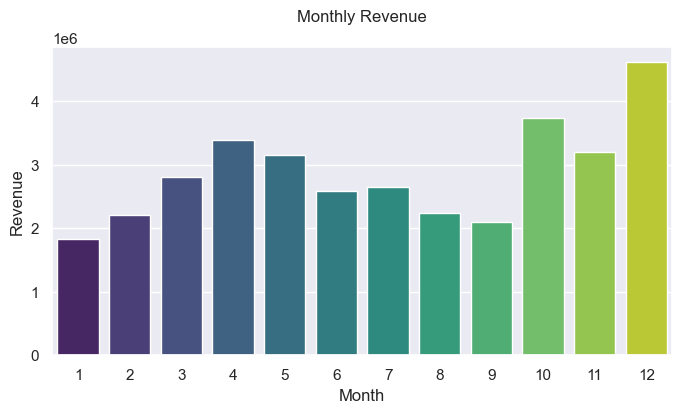

In [15]:
# Plotting data with barplot
plt.figure(figsize = (8,4))
sns.barplot(data = monthly_revenue, x = 'Month', y = 'Revenue', palette = 'viridis')\
   .set(title = 'Monthly Revenue\n')

In [16]:
# Number of transactions after filtering data
df.shape[0]

185950

In [17]:
# Overall revenue sum in 2019
monthly_revenue['Revenue'].sum()

34492035.97

In [18]:
# Stats for numeric data
monthly_revenue.describe()

,Month,Revenue
count,12.000000,1.200000e+01
mean,6.500000,2.874336e+06
std,3.605551,7.931995e+05
min,1.000000,1.822257e+06
25%,3.750000,2.233857e+06
50%,6.500000,2.727438e+06
75%,9.250000,3.247370e+06
max,12.000000,4.613443e+06


In [19]:
# Maximum revenue
monthly_revenue.max()

Month           12.00
Revenue    4613443.34
dtype: float64

In [20]:
# Daily revenue data
# Setting lower limit (10000) to escape from invalid value from 2020 year
df['Date'] = df['Order Date'].dt.date
daily_revenue = df.groupby('Date', as_index=False).agg({'Total Price':'sum'}).rename(columns = {'Total Price':'Revenue'})
daily_revenue = daily_revenue[daily_revenue['Revenue'] > 10000]
daily_revenue

,Date,Revenue
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63
...,...,...
360,2019-12-27,126628.05
361,2019-12-28,134015.50
362,2019-12-29,156024.62
363,2019-12-30,152319.81


[Text(0.5, 1.0, 'Daily Revenue\n')]

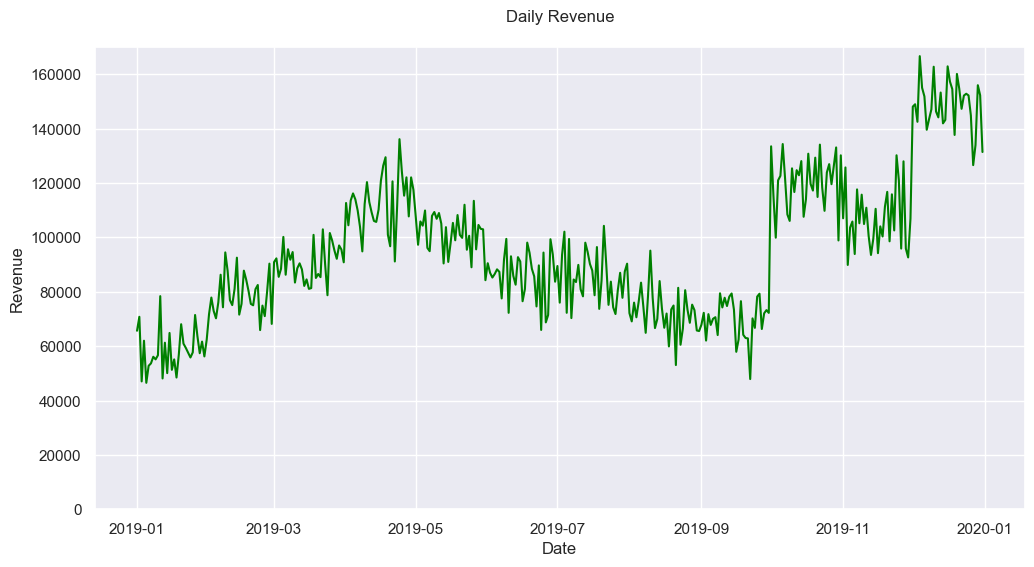

In [21]:
# Plotting daily revenue data with lineplot
plt.figure(figsize = (12,6))
plt.ylim(0, 170000)
sns.lineplot(data = daily_revenue, x = 'Date', y = 'Revenue', color = 'green').set(title = 'Daily Revenue\n')

In [22]:
# Stats for numeric data
daily_revenue.describe()

,Revenue
count,365.000000
mean,94474.974466
std,25728.889127
min,46524.630000
25%,74934.910000
50%,90943.910000
75%,109371.000000
max,166727.690000


In [23]:
# Maximum revenue per day
daily_revenue.max()

Date       2019-12-31
Revenue     166727.69
dtype: object

In [24]:
# Minimum revenue per day
daily_revenue.min()

Date       2019-01-01
Revenue      46524.63
dtype: object

## Sales stats in different periods in 2019
### Total revenue : 34,492,035.97 USD
### Total number of sales : 185950
### Average monthly revenue : 2,874,336.33 USD
### Most successfull month by revenue : December (4,613,443.34 USD)
### Least successfull month by revenue : January (1,822,256.73 USD)
### Maximum daily revenue : 166,727.69 USD (2019-12-31)
### Minimum daily revenue : 46,524.63 USD (2019-01-01)
### Average daily revenue : 94,474.97 USD

In [25]:
# Collecting quantitive sales data
quantity_sold = df[['Product', 'Quantity Ordered']].groupby('Product', as_index=False)\
                                                   .agg({'Quantity Ordered':'sum'})\
                                                   .rename(columns = {'Quantity Ordered':'Total Quantity'})\
                                                   .sort_values('Total Quantity', ascending=False)
                
quantity_sold

,Product,Total Quantity
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


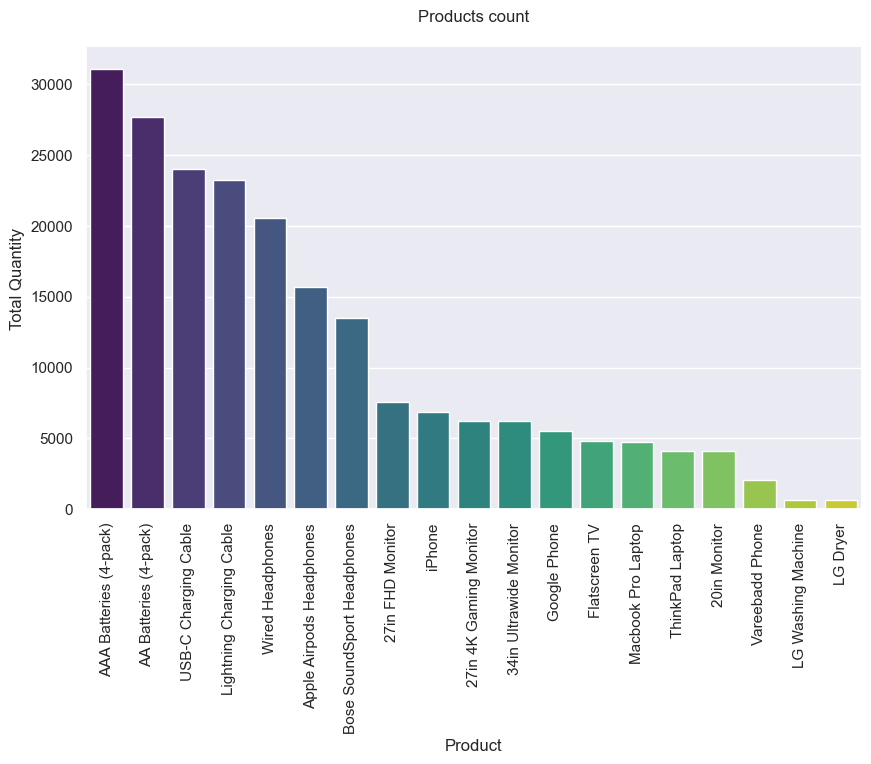

In [26]:
# Plotting data with barplot
plt.figure(figsize=(10,6))
plt.xticks(rotation = 90)
sns.barplot(data = quantity_sold, x = 'Product', y = 'Total Quantity', palette='viridis')\
   .set(title = 'Products count\n')
sns.despine()

In [27]:
# Collecting product data
products_data = df[['Product','Quantity Ordered','Price Each', 'Total Price']]
products_data

,Product,Quantity Ordered,Price Each,Total Price
0,Macbook Pro Laptop,1,1700.00,1700.00
1,LG Washing Machine,1,600.00,600.00
2,USB-C Charging Cable,1,11.95,11.95
3,27in FHD Monitor,1,149.99,149.99
4,USB-C Charging Cable,1,11.95,11.95
...,...,...,...,...
186845,AAA Batteries (4-pack),1,2.99,2.99
186846,27in FHD Monitor,1,149.99,149.99
186847,USB-C Charging Cable,1,11.95,11.95
186848,USB-C Charging Cable,1,11.95,11.95


In [28]:
# Most expensive product
max_price = products_data['Price Each'].max()
products_data[products_data['Price Each'] == max_price][['Product','Price Each']].head(1)

,Product,Price Each
0,Macbook Pro Laptop,1700.0


In [29]:
# The cheapest product
min_price = products_data['Price Each'].min()
products_data[products_data['Price Each'] == min_price][['Product','Price Each']].head(1)

,Product,Price Each
9,AAA Batteries (4-pack),2.99


In [30]:
# Sales sumary per product
profits = products_data.groupby('Product', as_index=False)\
                        .agg({'Total Price':'sum'})\
                        .sort_values('Total Price', ascending=False)\
                        .rename(columns = {'Total Price':'Total Revenue'})
profits

,Product,Total Revenue
13,Macbook Pro Laptop,8037600.00
18,iPhone,4794300.00
14,ThinkPad Laptop,4129958.70
9,Google Phone,3319200.00
1,27in 4K Gaming Monitor,2435097.56
3,34in Ultrawide Monitor,2355558.01
6,Apple Airpods Headphones,2349150.00
8,Flatscreen TV,1445700.00
7,Bose SoundSport Headphones,1345565.43
2,27in FHD Monitor,1132424.50


[Text(0.5, 1.0, 'Total yearly revenue for each product in millions USD\n')]

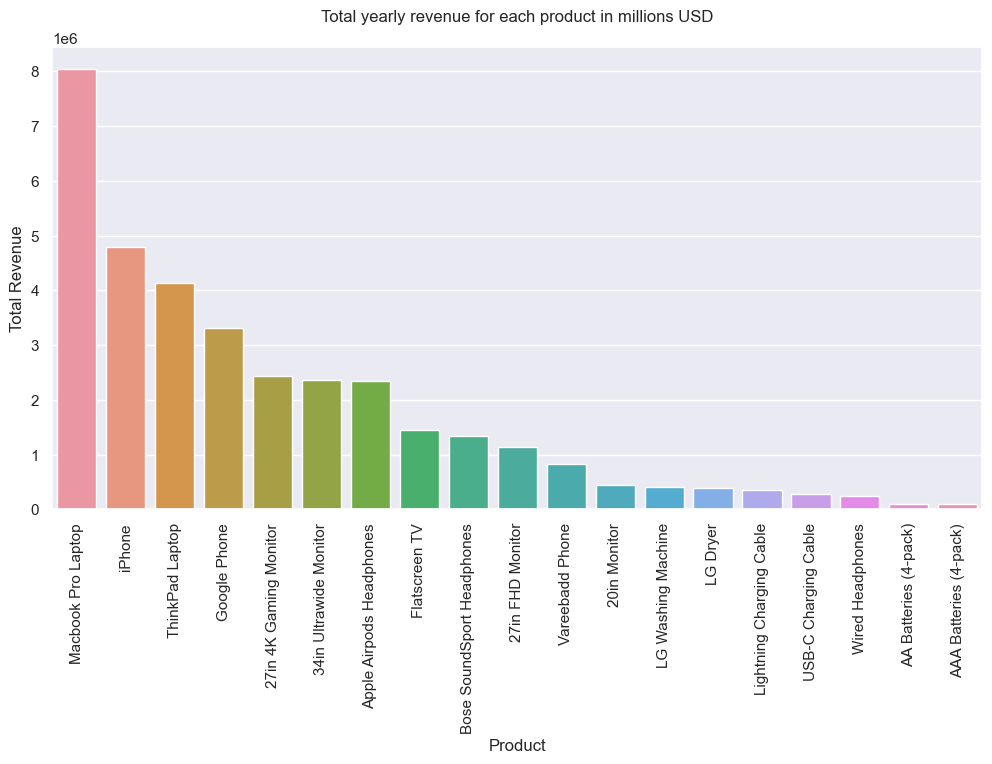

In [31]:
# Plotting sales data with barplot
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)

sns.barplot(data = profits, x = 'Product', y ='Total Revenue')\
   .set(title = 'Total yearly revenue for each product in millions USD\n')


## Products stats in 2019
### Most popular product : AAA Batteries (4-pack) (31017 units)
### Least popular product : LG Dryer (646 units)
### Most expensive product : Macbook Pro Laptop (1700 USD)
### The cheapest product : AAA Batteries (4-pack) (2.99 USD)
### Most profitable product : Macbook Pro Laptop (8,037,600.00 USD Total)
### Less profitable product : AAA Batteries (4-pack)	(92,740.83 USD Total)

## Summary:
AAA Batteries (4-pack) sold more than others. They can be used to power a lot of devices that accepts AAA batteries. I think it sold more because it's the most popular type of non-rechargeable batteries for low-voltage wireless devices.

In [32]:
# Collecting time data
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price,Date,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,2019-12-30,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,2019-12-29,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,2019-12-12,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,2019-12-22,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,2019-12-18,12


[Text(0.5, 1.0, 'Customers activity\n')]

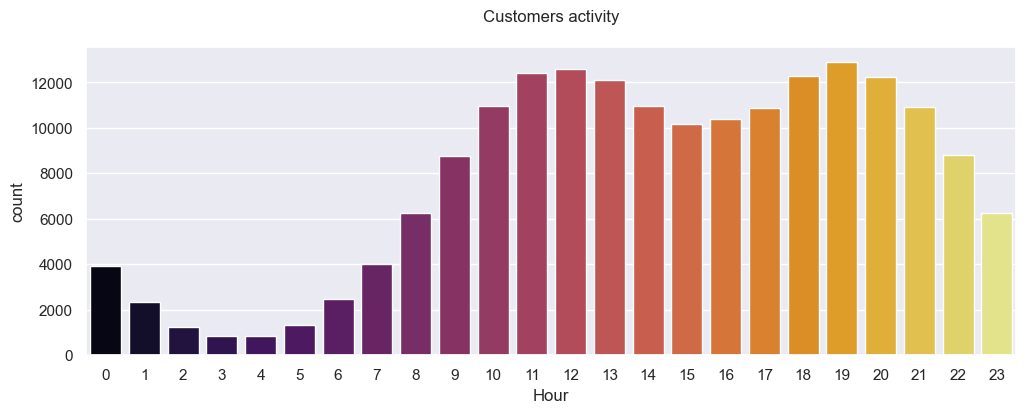

In [33]:
# Plotting activity data with countplot
plt.figure(figsize = (12,4))
sns.countplot(x = df.Hour, palette='inferno').set(title = 'Customers activity\n')

# Activity summary:
## We have two peaks of activity : 12:00 and 19:00
## And large activity collapse from 3:00 to 5:00

In [34]:
# Extracting city from Purchase Address column
df['City'] = df['Purchase Address'].str.split(',').apply(lambda x: x[-2].strip())

In [35]:
# Counting sales summary by city
cities_data = df.groupby('City', as_index=False)\
           .agg({'Total Price':'sum'})\
           .rename(columns={'Total Price':'Total Revenue'})\
           .sort_values('Total Revenue', ascending=False)
cities_data

,City,Total Revenue
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


[Text(0.5, 1.0, 'Total yearly revenue by city\n')]

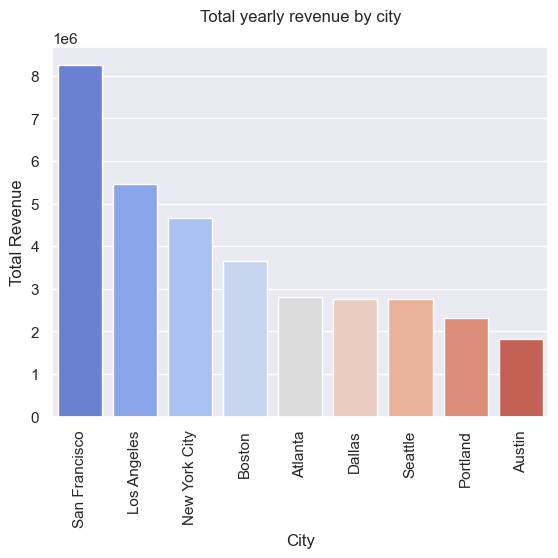

In [36]:
# Plotting overall revenue by city in barplot
plt.xticks(rotation = 90)
sns.barplot(data = cities_data ,x = 'City', y = 'Total Revenue', palette='coolwarm').set(title = 'Total yearly revenue by city\n')

## San Francisco is most successfill city by revenue in 2019

In [37]:
# Collecting mean values of purchases by city
purchase = df.groupby(['City','Order ID'], as_index=False).agg({'Total Price':'sum'})
avg_purchase = purchase.groupby('City', as_index=False)\
                       .agg({'Total Price':'mean'})\
                       .rename(columns = {'Total Price':'Average Purchase'})\
                       .sort_values('Average Purchase', ascending = False)
avg_purchase

,City,Average Purchase
0,Atlanta,196.134048
5,New York City,195.585266
8,Seattle,194.614029
3,Dallas,194.380295
6,Portland,193.697046
7,San Francisco,192.601145
2,Boston,191.789336
1,Austin,191.353639
4,Los Angeles,191.331700


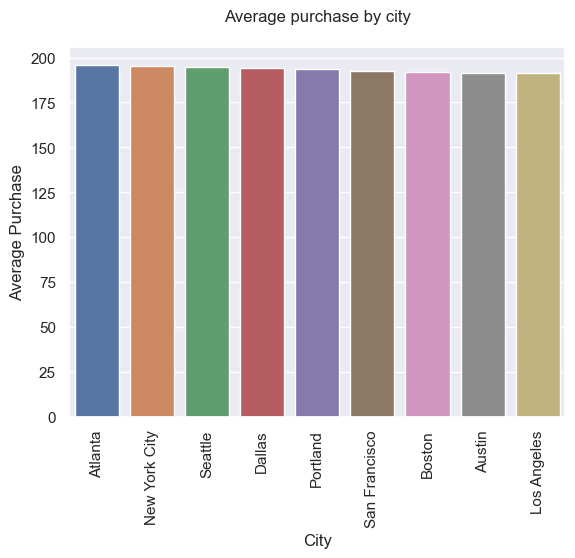

In [38]:
# Plotting mean values with barplot
sns.barplot(data = avg_purchase, x = 'City', y = 'Average Purchase').set(title = 'Average purchase by city\n')
plt.xticks(rotation = 90)
plt.show()

In [39]:
# Overall average purchase
round(avg_purchase['Average Purchase'].mean(),2)

193.5

### Atlanta is most successful city by average purchase (196.13 USD)
### Overall average purchase is 193.5

In [40]:
# Probability to buy USB-C Charging Cable
round(df[df['Product'] == "USB-C Charging Cable"].count()[0]/df.shape[0],2)

0.12

### The probability that next people will ordered USB-C Charging Cable is 12%

In [41]:
round(df[df['Product'] == "iPhone"].count()[0]/df.shape[0],2)

0.04

### The probability that next people will ordered iPhone is 4%

In [42]:
round(df[df['Product'] == "Google Phone"].count()[0]/df.shape[0],2)

0.03

### The probability that next people will ordered Google Phone is 3%

In [43]:
round(df[df['Product'] == "Wired Headphones"].count()[0]/df.shape[0],2)

0.1

### The probability that next people will ordered Wired Headphones is 10%